Import Libraries

In [26]:
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

File/Variable Name config

In [27]:
files = ['just_dshock_h.mat', 'just_policy_h.mat', 'dshock_policy_h.mat'] 
variables = ['C', 'IK', 'IH', 'K', 'H', 'Y', 'R', 'D', 'HTOK'] 
experiment_names = ['Debt Relief Only', 'Policy Reform Only', 'Debt Relief & Policy Reform']
title = {'C': 'Consumption (C)', 
         'IK': 'Gross Captal Investment (IK)', 
         'IH': 'Gross Human Investment (IH)', 
         'K': 'Capital (K)', 
         'H': 'Human Capital (H)', 
         'Y': 'Output (Y)', 
         'R': 'Domestic Interest Rate (r, %)', 
         'D': 'External Debt (D)', 
         'HTOK': 'Ratio of H to K (H/K)'
}

Plot

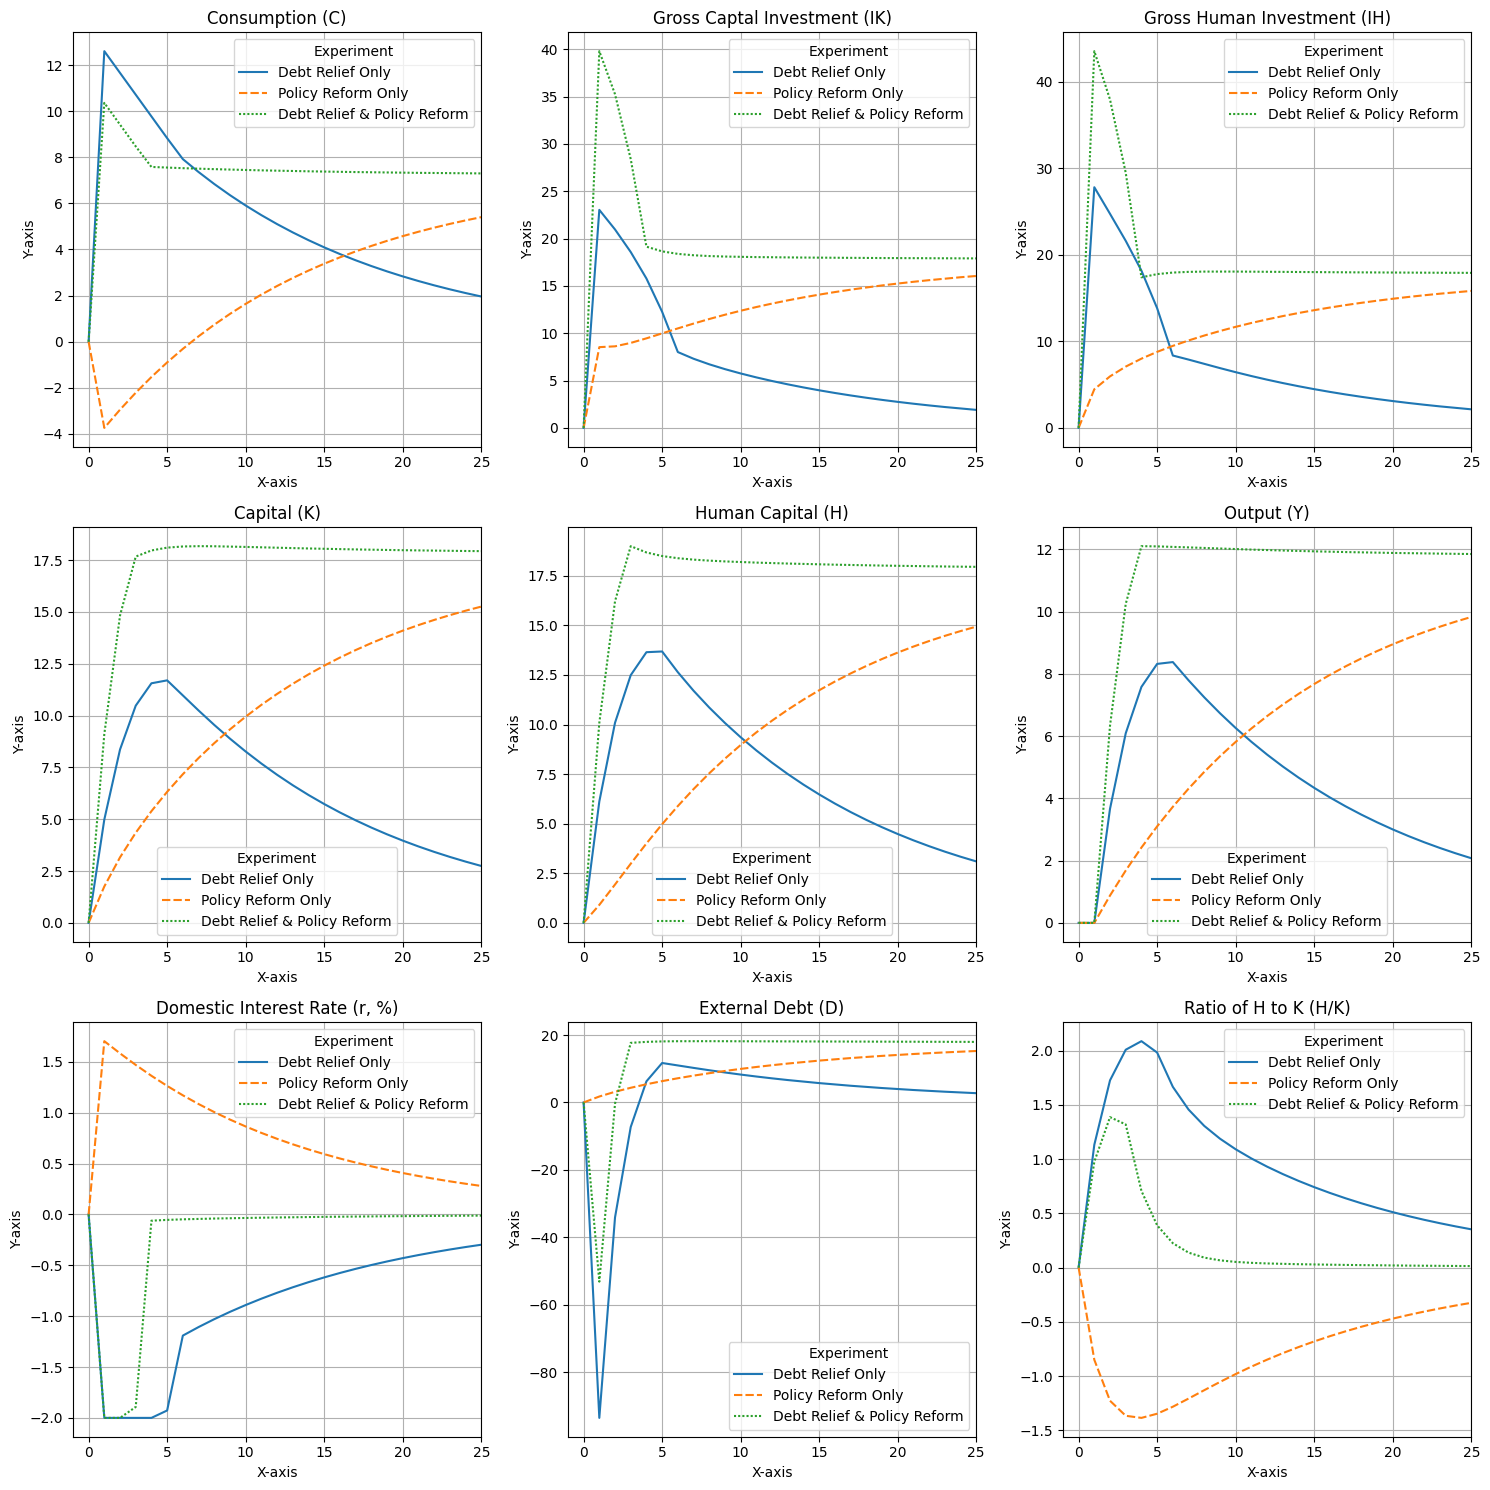

In [30]:
dfs = {var: pd.DataFrame() for var in variables}

for file, exp_name in zip(files, experiment_names):
    data = scipy.io.loadmat(file)
    for var in variables:
        df = pd.DataFrame(data[var])
        df['Experiment'] = exp_name
        df['Index'] = df.index  
        dfs[var] = pd.concat([dfs[var], df], ignore_index=True)

# Plot the data in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    sns.lineplot(data=dfs[var], x='Index', y=0, hue='Experiment', style='Experiment', ax=ax)  
    ax.set_title(title[var])
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')  
    ax.set_xlim(-1, 25)
    ax.grid(True)

plt.tight_layout()
plt.show()